# Gradient Descent Algorithm

Youtube link : https://www.youtube.com/watch?v=sDv4f4s2SB8

Drive Link to Flow chart : https://drive.google.com/file/d/16D9otbz-Gl-KBYc4K9zDJZGxaAbq53B9/view?usp=sharing

# Implementing the Gradient Descent Algorithm in a Sales- Advertisement Datset 

In [1]:
### Loading the liabraries
## Importing all the necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import statistics

## Displaying multiple outputs in the Jupyter file
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## Let's load the dataset now:
file_loc = r'C:\Users\U367393\Documents\01 Personal Documents\Python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data'
file_name = 'Advertising.csv'
adv_df = pd.read_csv(file_loc +r'\\' + file_name)

In [3]:
## Let's look at the dataframe
adv_df.head(5)
adv_df.info()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


The objective is to predict the Sales using advertising spend in TV, Radio and Newspaper. 

In [4]:
### Creating the dep and ind variables
y = adv_df.loc[:, ['Sales']]
x = adv_df.loc[: , ['TV' , 'Radio' , 'Newspaper']]
y.head(2)
x.head(2)

,Sales
0,22.1
1,10.4


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [5]:
## Let's standardize the data 
def standardize(x):
    x = np.array(x)
    m = np.mean(x)
    v = np.std(x)
    return ((x-m)/v)
dep = y.apply(standardize , axis = 0)
ind = x.apply(standardize , axis = 0)
## Let's validate if standardization has been done properly or not?
dep.apply(np.mean , axis = 0)
dep.apply(np.std , axis = 0)
ind.apply(np.mean , axis = 0)
ind.apply(np.std , axis = 0)

Sales   -2.148975e-16
dtype: float64

Sales    1.0
dtype: float64

TV           1.104672e-16
Radio       -4.413137e-16
Newspaper    2.220446e-16
dtype: float64

TV           1.0
Radio        1.0
Newspaper    1.0
dtype: float64

In [6]:
## Let's create a test and train dataset to run grad descent algorithm on
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(ind , dep , train_size = 0.7 , random_state = 42)

In [7]:
# Creating a function that generates random feature weights 
def initialize_weights(num):
    np.random.seed(0)
    ## Initializing bias or intercept first
    b = np.random.rand(1,1)
    w = np.random.rand(num,1)
    return b.flatten(), w

## Calculating the predicted value of the variable:
def y_pred(b,w,x):
    return b+ np.matmul(x.to_numpy(),w)

## Creating cost function
def cost_function(act , pred):
    ## Calculating mean square error
    act = act.to_numpy()
    resid = act - pred
    return np.sum(resid**2)/len(act)

## Updating the beta values
def update_beta(b,w ,pred , actual , learning_rate, x):
    ## Gradient of intercept
    db = (2* np.sum(pred-actual.to_numpy()))/len(pred)
    ## Gradient of weights
    dw = (2* np.dot(np.transpose(pred-actual.to_numpy()) , x.to_numpy()))/len(pred)
    ## updating the parameter
    b_1 = b- learning_rate * db
    w_1 = w- learning_rate * np.transpose(dw)
    ## Returing the new bias and weight parameters 
    return b_1 , w_1


In [8]:
def run_grad_descent(dep, ind , alpha , num_iterations):
    # Initialize the bias and weighs
    b,w = initialize_weights(ind.shape[1])
    gd_iter_df = pd.DataFrame( columns = ['iteration' , 'cost'])
    
    for i in range(num_iterations):
        ## Predict Y based on the initial weight parameters
        y_hat = y_pred(b , w  , ind)
        ## Calculate the loss function
        cost = cost_function(dep , y_hat)
        ## Store previous coeffs
        int_prev = b
        coeff_prev = w
        ## New Weights
        b, w = update_beta(int_prev , coeff_prev , y_hat , dep , alpha , ind)
        ## Store the cost and iteration count
        gd_iter_df.loc[i, 'iteration'] = i
        gd_iter_df.loc[i , 'cost'] = cost
        
    return gd_iter_df , b,w

[0.03248846] [[0.71416945]
 [0.53441337]
 [0.07838266]]


[0.00221864] [[0.72500382]
 [0.56709306]
 [0.02872862]]


[0.00221915] [[0.72500442]
 [0.56708336]
 [0.02873933]]


Text(0, 0.5, 'Loss Function')

Text(0.5, 0, 'Number of Iterations')

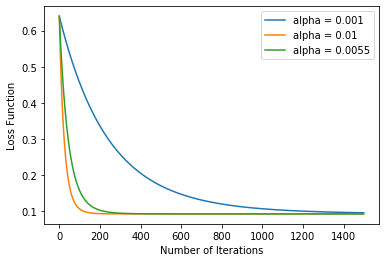

In [9]:
for i in [0.001 , 0.01 , 0.0055]:      
    gd_df, b, w = run_grad_descent( dep=train_y, ind=train_x, alpha =  i, num_iterations = 1500)
    plt.plot(gd_df['iteration'] , gd_df['cost'] , label = ('alpha = '+ str(i)))
    print(b,w)
    plt.legend()
plt.ylabel('Loss Function')
plt.xlabel('Number of Iterations')
    

The algorithm is very much dependent on the value of learnaing parameter. This means that if the learning parameter is too low, the algorithm will take a lot of iterations to reach to the answer, thereby defying the overall purpose of the algorithm. However, if the learning parameter is too high, the algorithm may skip the minima all together and may oscillate between the unoptimized values

# Scikit Liabrary for Machine Learning

In [10]:
from sklearn.linear_model import LinearRegression
## Initializing the model
linreg = LinearRegression(fit_intercept=True)
## Fitting the model
linreg.fit(train_x , train_y)
## Printing the coeff
print('Intercept is {}'.format(linreg.intercept_))
print('Coefficients are {}'.format(linreg.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept is [0.00221864]
Coefficients are [[0.72500382 0.56709307 0.02872862]]


<B>Comparing the Gradient Descent Results with the SKLEARN </B> : It can be seen that the value of the base and coefficients are very close to each other when learning parameter equals 0.01. For the other learning parameters, the value does not match the output of SKlearn. However, if we were to increase the iterations of the gradient descent, we will approach the coeff. through all the learning parameters

In [11]:
## Predicting the test set
test_df = pd.DataFrame({
                        'actual' : list(test_y['Sales']) , 
                        'predicted' : list(linreg.predict(test_x).flatten())
                      })
test_df['residual'] = test_df['actual'] - test_df['predicted']
test_df.head(5)

,actual,predicted,residual
0,0.552898,0.488605,0.064293
1,1.609697,1.376860,0.232836
2,1.417551,1.446579,-0.029027
3,-1.291696,-0.602041,-0.689655
4,2.051631,1.571713,0.479917


# Measuring the accuracy of prediction

In [12]:
from sklearn import metrics
## Calculating R^2 
print('r2_score of the model is ' , metrics.r2_score(y_true=test_df['actual'] , y_pred= test_df['predicted']))
## Calculating RMSE 
print('RMSE of the prediction is' , np.sqrt(metrics.mean_squared_error(test_df['actual'] , y_pred= test_df['predicted'])))

r2_score of the model is  0.8609466508230368
RMSE of the prediction is 0.37440213765824193
